Cifar10

http://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 


In [52]:
# Bibliotecas

import os
import keras
import numpy as np
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

%matplotlib inline

In [7]:
# Hiperparametros

batch_size = 32
num_classes = 10
epochs = 20

In [4]:
# Carregando o Dataset cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_test = to_categorical(y_test, num_classes)
y_train = to_categorical(y_train, num_classes)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
__________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 309s 6ms/step - loss: 1.5306 - acc: 0.4331 - val_loss: 1.1705 - val_acc: 0.5795
Epoch 2/20
50000/50000 [==============================] - 302s 6ms/step - loss: 1.1194 - acc: 0.6005 - val_loss: 1.0028 - val_acc: 0.6458
Epoch 3/20
50000/50000 [==============================] - 302s 6ms/step - loss: 0.9778 - acc: 0.6556 - val_loss: 0.8556 - val_acc: 0.7032
Epoch 4/20
50000/50000 [==============================] - 302s 6ms/step - loss: 0.8934 - acc: 0.6872 - val_loss: 0.7928 - val_acc: 0.7236
Epoch 5/20
50000/50000 [==============================] - 305s 6ms/step - loss: 0.8406 - acc: 0.7044 - val_loss: 0.7492 - val_acc: 0.7447
Epoch 6/20
50000/50000 [==============================] - 301s 6ms/step - loss: 0.7958 - acc: 0.7206 - val_loss: 0.7772 - val_acc: 0.7319
Epoch 7/20
50000/50000 [==============================] - 302s 6ms/step - loss: 0.7611 - acc: 0.7341 - val_loss: 0.7755 - 

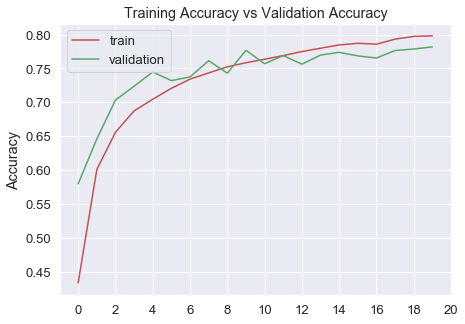

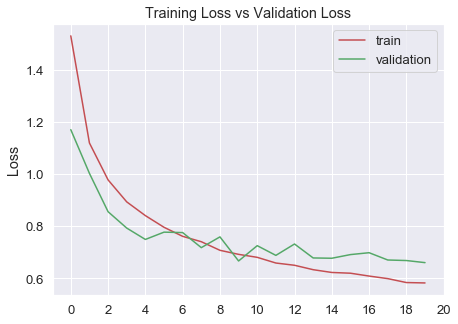

In [115]:
# plot acc e loss

plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 21, 2.0))
plt.rcParams['figure.figsize'] = (7, 5)
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 21, 2.0))
plt.rcParams['figure.figsize'] = (7, 5)
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

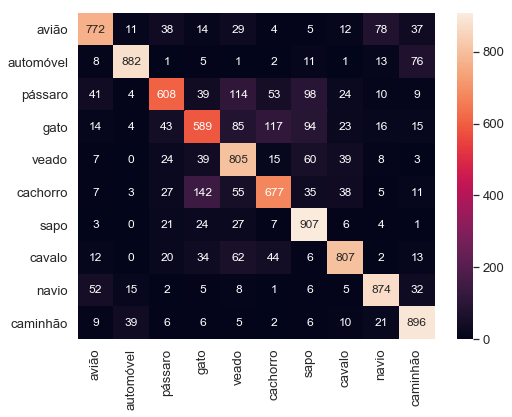

In [113]:
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
    
labels = ['avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']    
    
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)

df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize = (8,6))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 12})#


plt.show()